#**LOAD DATASET**

##DATASET : https://archive.ics.uci.edu/ml/datasets/sms+spam+collection

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Text Preprocessing
import nltk
# nltk.download
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

import spacy
nlp = spacy.load("en_core_web_sm")

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
from google.colab import drive
%matplotlib inline     
sns.set(color_codes=True)

drive.mount('/content/drive')
file_url = ('/content/drive/My Drive/Colab Notebooks/SMSSpamCollection.txt')

#df = "/content/SMSSpamCollection.txt"

messages = pd.read_csv(file_url, sep = '\t', header=None, names=["category", "text"])
messages.head()

Mounted at /content/drive


,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


##VISUALISASI DATA

###Info Dataframe

In [ ]:
display(messages.head(n = 10))

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
# Info dataset
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   text      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
messages.describe()

,category,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [ ]:
messages['category'].value_counts()

ham     4825
spam     747
Name: category, dtype: int64

In [ ]:
messages.head()

,category,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
messages.tail()

,category,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
messages.dtypes

category    object
text        object
dtype: object

###Diagram Data

<function matplotlib.pyplot.show(close=None, block=None)>

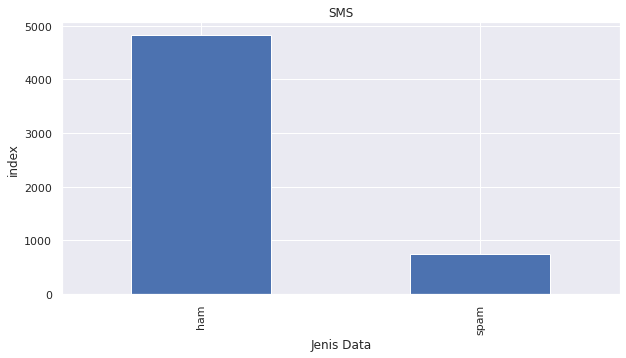

In [ ]:
messages.category.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.xlabel("Jenis Data")
plt.ylabel("index")
plt.title("SMS")
plt.show

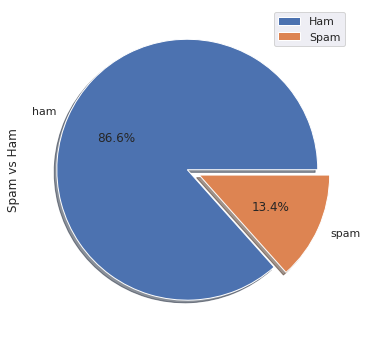

In [ ]:
messages["category"].value_counts().plot(kind = 'pie', 
explode = [0, 0.1], figsize = (6, 6), autopct = '%1.1f%%', shadow = True)

plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [ ]:
topMessages = messages.groupby("text")["category"].agg([len, np.max]).sort_values(by = "len", ascending = False).head(n = 10)
display(topMessages)

,len,amax
text,,
"Sorry, I'll call later",30,ham
I cant pick the phone right now. Pls send a message,12,ham
Ok...,10,ham
Ok,4,ham
Okie,4,ham
"7 wonders in My WORLD 7th You 6th Ur style 5th Ur smile 4th Ur Personality 3rd Ur Nature 2nd Ur SMS and 1st ""Ur Lovely Friendship""... good morning dear",4,ham
"Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.",4,ham
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..,4,ham
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!,4,spam


In [ ]:
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
spam_messages = messages[messages["category"] == "spam"]["text"]
ham_messages = messages[messages["category"] == "ham"]["text"]

spam_words = []
ham_words = []

# Karena ini hanya mengklasifikasikan pesan sebagai spam atau ham, kita dapat menggunakan isalpha().
# Ini juga akan menghapus kata 'tidak/bukan' dalam suatu kata seperti 'tidak bisa' dll.
# Lebih baik digunakan dalam pengaturan analisis sentimen.
# sentence.translate(string.maketrans("", "", ), chars_to_remove)

def extractSpamWords(spamMessages):
    global spam_words
    words = [word.lower() for word in word_tokenize(spamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    spam_words = spam_words + words
    
def extractHamWords(hamMessages):
    global ham_words
    words = [word.lower() for word in word_tokenize(hamMessages) if word.lower() not in stopwords.words("english") and word.lower().isalpha()]
    ham_words = ham_words + words

spam_messages.apply(extractSpamWords)
ham_messages.apply(extractHamWords)

0       None
1       None
3       None
4       None
6       None
        ... 
5565    None
5568    None
5569    None
5570    None
5571    None
Name: text, Length: 4825, dtype: object

In [ ]:
from wordcloud import WordCloud

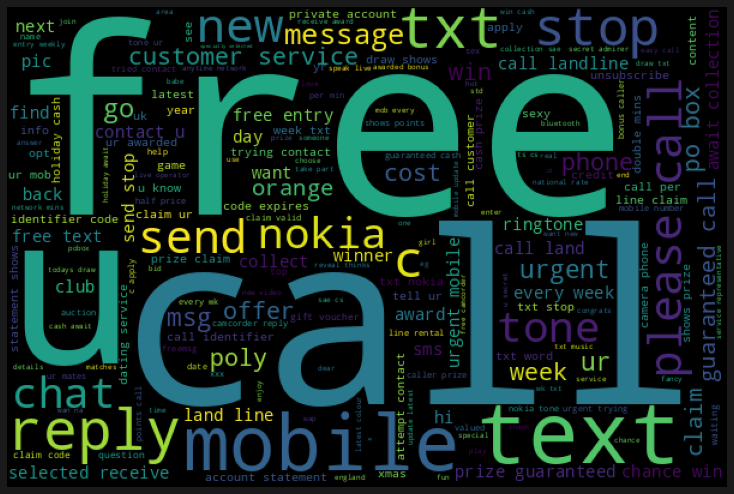

In [ ]:
#Spam Wordcloud

spam_wordcloud = WordCloud(width=600, height=400).generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

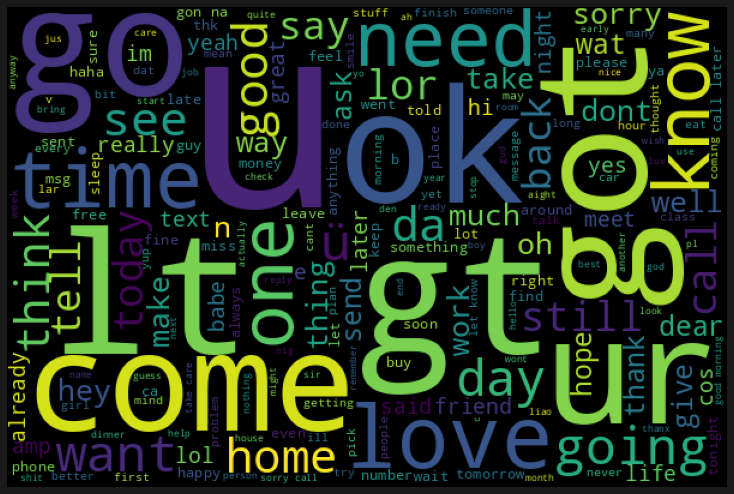

In [ ]:
#Ham Wordcloud

ham_wordcloud = WordCloud(width=600, height=400).generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [ ]:
# Menampilkan 10 kata/frasa yang paling sering digunakan pada pesan Spam
spam_words = np.array(spam_words)
print("Top 10 kata/frasa spam :\n")
pd.Series(spam_words).value_counts().head(n = 10)

Top 10 kata/frasa spam :



call      346
free      219
txt       156
u         145
ur        144
mobile    123
text      121
stop      118
claim     113
reply     104
dtype: int64

In [ ]:
# Menampilkan 10 kata/frasa yang paling sering digunakan pada pesan Ham
ham_words = np.array(ham_words)
print("Top 10 kata/frasa ham :\n")
pd.Series(ham_words).value_counts().head(n = 10)

Top 10 kata/frasa ham :



u       1006
gt       318
lt       316
get      302
ok       262
go       251
ur       247
got      245
know     237
like     233
dtype: int64

In [ ]:
messages["messageLength"] = messages["text"].apply(len)
messages["messageLength"].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: messageLength, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


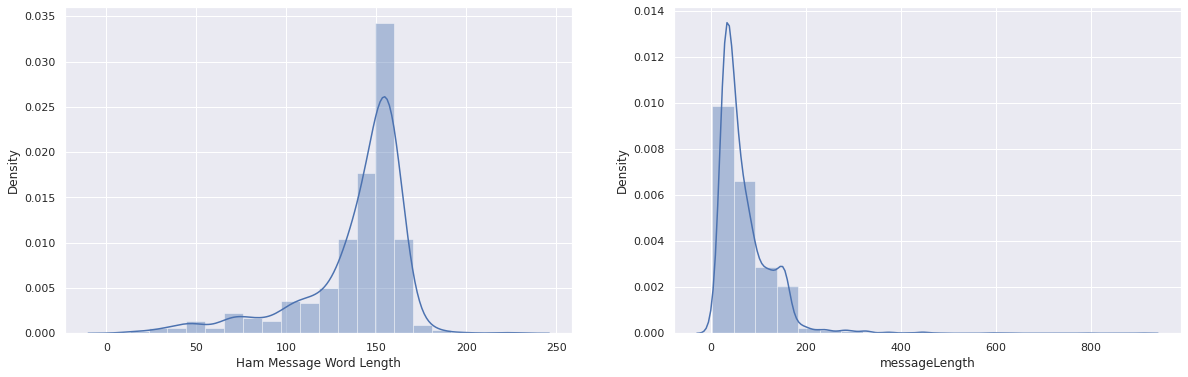

In [ ]:
f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(messages[messages["category"] == "spam"]["messageLength"], bins = 20, ax = ax[0])
ax[0].set_xlabel("Spam Message Word Length")

sns.distplot(messages[messages["category"] == "ham"]["messageLength"], bins = 20, ax = ax[1])
ax[0].set_xlabel("Ham Message Word Length")

plt.show()

##PREPROCESSING

###Stopword + Stemming

In [ ]:
from nltk.stem import SnowballStemmer
stemmer = SnowballStemmer("english")

def cleanText(message):
    
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    
    return " ".join(words)

messages["text"] = messages["text"].apply(cleanText)
messages.head(n = 10)   

,category,text,messageLength
0,ham,go jurong point crazi avail bugi n great world...,111
1,ham,ok lar joke wif u oni,29
2,spam,free entri 2 wkli comp win fa cup final tkts 2...,155
3,ham,u dun say earli hor u c alreadi say,49
4,ham,nah dont think goe usf live around though,61
5,spam,freemsg hey darl 3 week word back id like fun ...,147
6,ham,even brother like speak treat like aid patent,77
7,ham,per request mell mell oru minnaminungint nurun...,160
8,spam,winner valu network custom select receivea £90...,157
9,spam,mobil 11 month u r entitl updat latest colour ...,154


##KONVERSI MODEL MACHINE LEARNING

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(messages["text"])
print(features.shape)

(5572, 7961)


####Model Apllication

In [ ]:
X = messages['text']
y = messages['category']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer

def classify(model, X, y):
    # train test split
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.99, random_state=42, shuffle=True, stratify=y)
    # model training
    pipeline_model = Pipeline([('vect', CountVectorizer()),
                              ('tfidf', TfidfTransformer()),
                              ('clf', model)])
    pipeline_model.fit(x_train, y_train)
    
    print('Accuracy:', pipeline_model.score(x_test, y_test)*100)
    
    #cv_score = cross_val_score(model, X, y, cv=5)
    #print("CV Score:", np.mean(cv_score)*100)
    y_pred = pipeline_model.predict(x_test)
    print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
classify(model, X, y)

Accuracy: 86.60503897045496
              precision    recall  f1-score   support

         ham       0.87      1.00      0.93      4777
        spam       1.00      0.00      0.00       740

    accuracy                           0.87      5517
   macro avg       0.93      0.50      0.47      5517
weighted avg       0.88      0.87      0.80      5517



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
print(cm)